In [146]:
import cv2
import numpy as np
import requests
import imutils
import imageio
from IPython.display import Image, display


In [147]:
url = 'http://weather.bangkok.go.th/radar/pics/radar.gif'
with open('data.gif', 'wb') as f:
    f.write(requests.get(url).content)

In [148]:
#https://gist.github.com/Nannigalaxy/35dd1d0722f29672e68b700bc5d44767
def center_crop(img, dim):
	"""Returns center cropped image
	Args:
	img: image to be center cropped
	dim: dimensions (width, height) to be cropped
	"""
	width, height = img.shape[1], img.shape[0]

	# process crop width and height for max available dimension
	crop_width = dim[0] if dim[0]<img.shape[1] else img.shape[1]
	crop_height = dim[1] if dim[1]<img.shape[0] else img.shape[0] 
	mid_x, mid_y = int(width/2), int(height/2)
	cw2, ch2 = int(crop_width/2), int(crop_height/2) 
	crop_img = img[mid_y-ch2:mid_y+ch2, mid_x-cw2:mid_x+cw2]
	return crop_img

In [168]:
path = './data.gif'
cap = cv2.VideoCapture(path)
resize = (200, 200)

frames = []
firstFrame = None

lower_color = np.array([0, 0, 0], dtype = 'uint8') 
upper_color= np.array([50, 255, 255], dtype = 'uint8')

while True:
    ret, frame = cap.read()
    if not ret:
        break
    #20 - 50 dBz detect
    frame = center_crop(frame, resize)
    mask = cv2.inRange(frame, lower_color, upper_color)
    detected_output = cv2.bitwise_and(frame, frame, mask = mask) 

    gray = cv2.cvtColor(detected_output, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)

    if firstFrame is None:
        firstFrame = gray
        continue

    thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]
    thresh = cv2.dilate(thresh, None, iterations=1)
    

    cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    for c in cnts:
        (x, y, w, h) = cv2.boundingRect(c)
        cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 1)
        frames.append(frame)
cap.release()
cv2.destroyAllWindows()
    

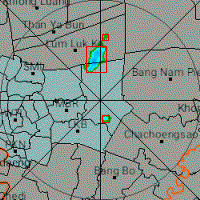

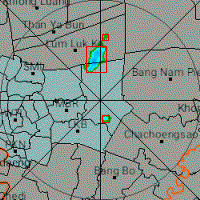

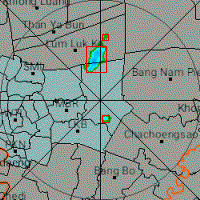

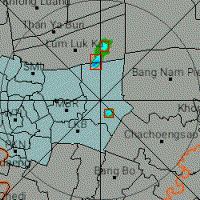

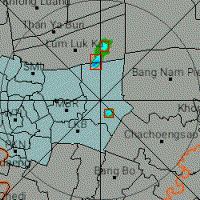

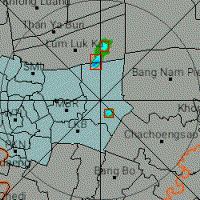

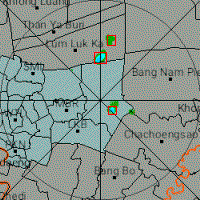

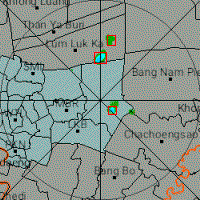

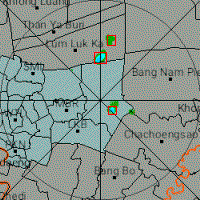

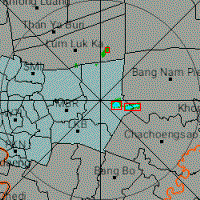

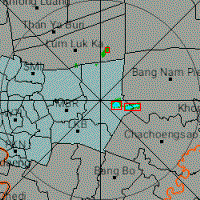

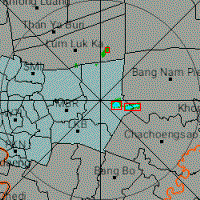

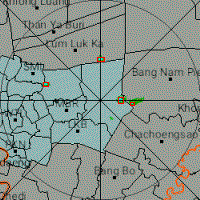

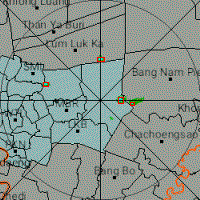

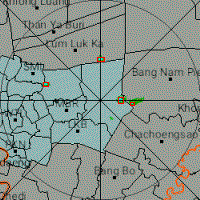

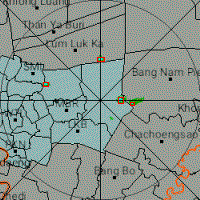

In [169]:
for frame_rgb in frames:
    display(Image(data=cv2.imencode('.png', frame_rgb)[1].tobytes()))

cv2.destroyAllWindows()


In [174]:
gif_path = './output.gif'

imageio.mimsave(gif_path, frames, loop=0, duration = 50)